# 1. Two-dimensional data
First we start by creating our nececarry inputs

In [3]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

Create three different sized datasets and save them in a dictionary

In [4]:
# Create the moon datasets of varying sizes
n_samples_small = 100
n_samples_medium = 500
n_samples_large = 1000

datasets = {
    "Small": make_moons(n_samples=n_samples_small, noise=0.1, random_state=0),
    "Medium": make_moons(n_samples=n_samples_medium, noise=0.1, random_state=0),
    "Large": make_moons(n_samples=n_samples_large, noise=0.1, random_state=0),
}

Lets start by implementing and training our 2D Histogram

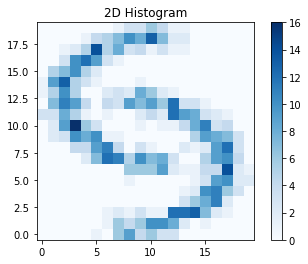

In [6]:
def train_histogram(X, y, bins=20):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    
    x_bins = np.linspace(x_min, x_max, bins + 1)
    y_bins = np.linspace(y_min, y_max, bins + 1)
    
    histogram = np.histogram2d(X[:, 0], X[:, 1], bins=[x_bins, y_bins])[0]
    
    return histogram

# Train histogram for a specific dataset (e.g., the small one)
X_small, y_small = datasets["Large"]
histogram_small = train_histogram(X_small, y_small)

# You can visualize the histogram if needed
plt.imshow(histogram_small, origin='lower', cmap='Blues')
plt.colorbar()
plt.title('2D Histogram')
plt.show()

# 2. Higher-dimensional data

In [3]:
from sklearn.datasets import load_digits
from sklearn.mixture import GaussianMixture
import numpy as np

Let's load the dataset:

In [4]:
digits = load_digits()
X = digits.data
y = digits.target

To have variying sized we create subsets of the original data

In [ ]:
# # Choose the percentage of data to use for training
# percentages = [0.2, 0.5, 1]

# # Initialize an empty list to store training datasets
# training_datasets = []

# for percent in percentages:
#     num_samples = int(X.shape[0] * percent)
#     training_data = X[:num_samples, :]
#     training_datasets.append(training_data)

Now we implement a single Gaussian model, by using the 'GaussianMixture' model from scikit-learn with just one component

In [7]:
model = GaussianMixture(n_components=1)
model.fit(X)
density_estimates = -model.score_samples(X)
density_estimates


array([80.78289483, 88.84049133, 99.51493384, ..., 92.71972787,
       92.39943427, 99.95472205])